In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path="C:\\Users\\Dennis\\Documents\\Bioinformatics\\Data_mining\\Data_mining_assignment_2\\"
sb_samples = pd.read_csv("Preprocessed_train.csv")
sb_samples.head()


,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,0,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,2196,4,...,3.0,1.0,0.0,3.0,NaN,NaN,NaN,0,NaN,0
1,1,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,3309,3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,0
2,2,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,11331,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,3,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,17795,4,...,11.0,1.0,0.0,220.0,NaN,NaN,NaN,0,NaN,0
4,4,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,21770,3,...,NaN,1.0,0.0,24.0,NaN,NaN,NaN,0,NaN,0


In [3]:
# Star rating and usd differences
sb_samples_f = sb_samples
sb_samples_f["starrating_diff"] = abs(sb_samples_f["visitor_hist_starrating"] - sb_samples_f["prop_starrating"])
sb_samples_f["usd_diff"] = abs(np.log10(sb_samples_f["visitor_hist_adr_usd"]) - np.log10(sb_samples_f["price_usd"]))
sb_samples_f = sb_samples_f.fillna(value = {"starrating_diff": 6, "usd_diff": 1.1})
sb_samples_f.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff
0,0,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,2196,4,...,0.0,3.0,NaN,NaN,NaN,0,NaN,0,6.0,1.1
1,1,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,3309,3,...,0.0,NaN,NaN,NaN,NaN,0,NaN,0,6.0,1.1
2,2,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,11331,4,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,6.0,1.1
3,3,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,17795,4,...,0.0,220.0,NaN,NaN,NaN,0,NaN,0,6.0,1.1
4,4,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,21770,3,...,0.0,24.0,NaN,NaN,NaN,0,NaN,0,6.0,1.1


In [4]:
# plot the histograms with or without NAs
## Change 0 to 1 to plot with NAs
plot_with_na = 1


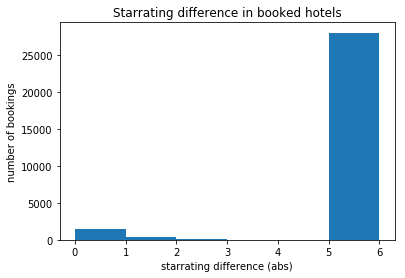

In [5]:
plt.hist(sb_samples_f.loc[sb_samples_f.booking_bool == 1][:]["starrating_diff"], bins = range(0,6+plot_with_na))
plt.xlabel("starrating difference (abs)")
plt.ylabel("number of bookings")
plt.title("Starrating difference in booked hotels")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


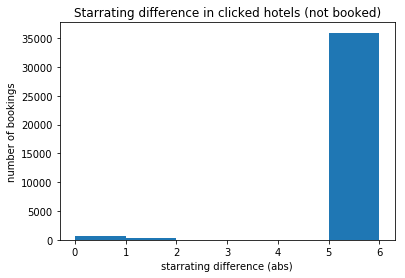

In [6]:
plt.hist(sb_samples_f.loc[sb_samples_f.click_bool == 1][sb_samples_f.booking_bool ==0][:]["starrating_diff"], bins = range(0,6+plot_with_na))
plt.xlabel("starrating difference (abs)")
plt.ylabel("number of bookings")
plt.title("Starrating difference in clicked hotels (not booked)")
plt.show()

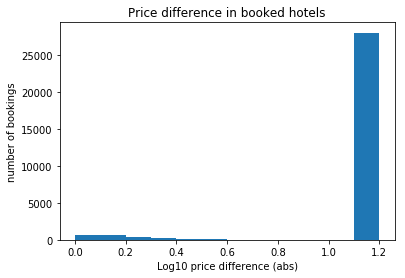

In [7]:
plt.hist(sb_samples_f.loc[sb_samples_f.booking_bool == 1][:]["usd_diff"], bins = np.arange(0,1.1+plot_with_na/10,0.1))
plt.xlabel("Log10 price difference (abs)")
plt.ylabel("number of bookings")
plt.title("Price difference in booked hotels")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


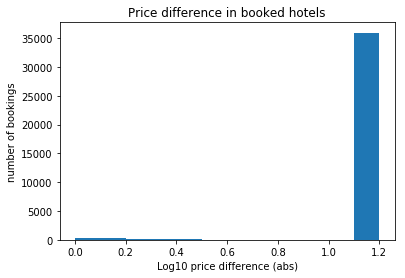

In [8]:
plt.hist(sb_samples_f.loc[sb_samples_f.click_bool == 1][sb_samples_f.booking_bool==0][:]["usd_diff"], bins = np.arange(0,1.1+plot_with_na/10,0.1))
plt.xlabel("Log10 price difference (abs)")
plt.ylabel("number of bookings")
plt.title("Price difference in booked hotels")
plt.show()

In [9]:
# Hotel quality
## times booked / times in the data
## times clicked / times in the data

hotel_quality = pd.DataFrame(sb_samples.prop_id.value_counts(dropna = False))
print(hotel_quality.head())
hotel_quality = hotel_quality.join(pd.DataFrame(sb_samples.prop_id[sb_samples.booking_bool == 1].value_counts().astype(int)), rsuffix = "book")
hotel_quality = hotel_quality.join(pd.DataFrame(sb_samples.prop_id[sb_samples.click_bool == 1].value_counts().astype(int)), rsuffix = "click")
hotel_quality.columns = ["counts", "booked", "clicked"]

hotel_quality["booked_percentage"] = hotel_quality.booked / hotel_quality.counts * 100
hotel_quality["clicked_percentage"] = hotel_quality.clicked / hotel_quality.counts * 100

sb_samples_f = sb_samples_f.join(hotel_quality.booked_percentage, on = "prop_id")
sb_samples_f = sb_samples_f.join(hotel_quality.clicked_percentage, on = "prop_id")
sb_samples_f = sb_samples_f.fillna(value = {"booked_percentage": 0, "clicked_percentage": 0})



        prop_id
124342      718
104517      711
40279       688
137997      682
77089       675


In [10]:
## Average comp price

In [11]:
sb_samples_f['avg_comp_rate'] = sb_samples_f[['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate']].mean(axis=1)
sb_samples_f = sb_samples_f.drop(['comp1_rate', "comp1_inv", "comp1_rate_percent_diff", 'comp2_rate', "comp2_inv", "comp2_rate_percent_diff", 'comp3_rate', "comp3_inv", "comp3_rate_percent_diff", 'comp4_rate', "comp4_inv", "comp4_rate_percent_diff", 'comp5_rate', "comp5_inv", "comp5_rate_percent_diff", 'comp6_rate', "comp6_inv", "comp6_rate_percent_diff", 'comp7_rate', "comp7_inv", "comp7_rate_percent_diff", 'comp8_rate', "comp8_inv", "comp8_rate_percent_diff"], axis = 1)
sb_samples_f = sb_samples_f.fillna(value = {"avg_comp_rate": 0})

In [12]:
sb_samples_f.head()

,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,srch_query_affinity_score,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate
0,0,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,2196,4,...,-326.5675,1,0,NaN,0,6.0,1.1,5.660377,5.660377,0.666667
1,1,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,3309,3,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,6.666667,0.000000
2,2,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,11331,4,...,-326.5675,1,0,NaN,0,6.0,1.1,5.263158,5.263158,0.000000
3,3,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,17795,4,...,-326.5675,1,0,NaN,0,6.0,1.1,4.000000,6.000000,1.000000
4,4,17,2012-11-05 19:52:18,18,129,NaN,NaN,31,21770,3,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,7.142857,1.000000


In [13]:
# To Do:
## Adultcount_Childrencount
## Roomcount_Bookwindow

In [14]:
# Generates the file
sb_samples_f.to_csv("Feature_engineering_train.csv")